In [ ]:
!pip install sys
import sys
import pandas as pd
import numpy as np
import os
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import scipy
from pprint import pprint
import gensim
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd() # to see working directory
os.chdir("/content/drive/MyDrive/Web 3.0") #changing workig directory to google drive

In [ ]:
df=pd.read_excel("Downloaded_9-12_Web3 _7 days.xlsx")
#df.columns
#df_t =df[["Full Text"]]
#df_t.head(5)
#df["Engagement Type"].unique() #To check unique values

In [ ]:
# list(df.columns) # to check columns of the df
# df.head(5)

In [ ]:
list(df.columns)


['Query Id',
 'Query Name',
 'Date',
 'Title',
 'Url',
 'Domain',
 'Sentiment',
 'Page Type',
 'Language',
 'Country Code',
 'Continent Code',
 'Continent',
 'Country',
 'City Code',
 'Account Type',
 'Added',
 'Assignment',
 'Author',
 'Avatar',
 'Category Details',
 'Checked',
 'City',
 'Display URLs',
 'Expanded URLs',
 'Facebook Author ID',
 'Facebook Comments',
 'Facebook Likes',
 'Facebook Role',
 'Facebook Shares',
 'Facebook Subtype',
 'Full Name',
 'Full Text',
 'Gender',
 'Hashtags',
 'Impact',
 'Impressions',
 'Instagram Comments',
 'Instagram Followers',
 'Instagram Following',
 'Instagram Interactions Count',
 'Instagram Likes',
 'Instagram Posts',
 'Interest',
 'Last Assignment Date',
 'Latitude',
 'Location Name',
 'Longitude',
 'Media Filter',
 'Media URLs',
 'Mentioned Authors',
 'Original Url',
 'Priority',
 'Professions',
 'Resource Id',
 'Short URLs',
 'Starred',
 'Status',
 'Subtype',
 'Thread Author',
 'Thread Created Date',
 'Thread Entry Type',
 'Thread Id',
 'T

In [ ]:
#df_nt= df[df["Engagement Type"] != "RETWEET"]
df_nt = df[df["Engagement Type"].isnull()]

Network Analysis

In [ ]:
#https://towardsdatascience.com/how-to-download-and-visualize-your-twitter-network-f009dbbf107b
#https://networkx.org/documentation/stable/reference/drawing.html
network = pd.DataFrame()
network["Source"] = df["Thread Author"]
network["Target"] = df["Author"]

In [ ]:
network_2 = network.sample(frac =1)

In [ ]:
import networkx as nx
G = nx.from_pandas_edgelist(network_2, 'Source', 'Target') #Turn df into graph. "from_pandas_edgelist" returns a graph from pandas dataframe containing an edge list
pos = nx.random_layout(G) #specify layout for visual. Position nodes uniformly at random in the unit square by randomly selecting position within a square. Its one way of presenting graph.
G.number_of_nodes()# Number of Nodes
G.number_of_edges()# Numbe of edges
nodes = G.nodes # The names of the all the nodes

In [ ]:
#dir(G) #Checks available attributes of network graph element
#G.nodes # Gets me the node names

In [ ]:
#Uncomment to get community plot
#import matplotlib.pyplot as plt
#f, ax = plt.subplots(figsize=(25, 25)) # return a figure and array of axes. ax can be either a single Axes object, or an array of Axes objects if more than one subplot was created.
#plt.style.use('ggplot')
#nodes = nx.draw_networkx_nodes(G, pos, alpha=0.2) # Draw the nodes of the graph G depending on the position generated by random_layout
#nodes.set_edgecolor('k')
#nx.draw_networkx_labels(G, pos, font_size=0.5) # Draw node labels on the graph G.
#nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2) # Draw edges on the graph G.

In [ ]:
# Calculate Degree Centrality:The degree centrality of a node is simply its degree—the number of edges it has. The higher the degree, the more central the node is.
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
#lambda x: x[1];lambda function takes the single argument x and returns x[1] (i.e. the item at index 1 in x or the second element of x). G.Degree = "Node Name : degree of node"
G_sorted.columns = ['Names','Degree']
G_sorted.head(10)

,Names,Degree
0,NaN,5605
1,societyofsnobs,803
2,binance,448
3,ProjectYinYang,443
4,AnthrosOfficial,342
5,wtfrzv,271
6,WatcherGuru,261
7,Web3Auditing,251
8,njokuEm43706291,245
9,missufe,216


In [ ]:
G.remove_edges_from(nx.selfloop_edges(G)) # Removes edges which has the same node at both ends

In [ ]:
# To filter graph to show nodes with more than 5 edges or Exclude nodes with degree less than 5
G_tmp = nx.k_core(G, 5)# k_core wont work if it has self loops
Nodes_tmp = G_tmp.nodes

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(25, 25))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G_tmp, pos,
                               alpha=0.2)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_tmp, pos, font_size=12, horizontalalignment ="right") # this is what to draw labels on the nodes

nx.draw_networkx_edges(G_tmp, pos, width=1.0, alpha=0.2)

Output hidden; open in https://colab.research.google.com to view.

Community Detection

In [ ]:
#splitting the graph into groups using a community detection algorithm
from community import community_louvain
partition = community_louvain.best_partition(G) # partition is a dictionary element. First or key is the Node name and second or value pairs is the community numbers
#Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['Names','group']

In [ ]:
#we have the nodes split into groups and we have the the degree of each node from before, we combine these into one DataFrame
combined = pd.merge(G_sorted,partition1, how='left', left_on="Names",right_on="Names")
combined.head(5)

,Names,Degree,group
0,NaN,5605,2
1,societyofsnobs,803,5
2,binance,448,34
3,ProjectYinYang,443,11
4,AnthrosOfficial,342,16


In [ ]:
#len(pd.unique(combined["group"])) # This gives the number of unique elements in a column
#combined["group"].value_counts() # This gives the count of unique elements in a column

In [ ]:
unique_count = combined.groupby(['group'], as_index=False).agg(Count=('Names', pd.Series.count))
unique_count_sort = unique_count.sort_values(by=["Count"], ascending=False)
top_10 = unique_count_sort.head(10) # dataframe of top 10 communities with thier counts
print(top_10)

     group  Count
2        2   4983
11      11   1732
5        5   1640
3        3   1036
292    292    938
84      84    841
353    353    831
34      34    798
23      23    789
18      18    756


In [ ]:
# Storing the community members and community numbers in a dictionary
dict_x={}
for community in top_10["group"]:
  i=0
  a=[]
  print(community)
  while i< len(combined.index):
    #print(i)
    if combined["group"].iloc[i] == community:
      a.append(combined["Names"].iloc[i])
      len(a)
    else:
      1
    i+=1
  dict_x.update({community:a})

2
11
5
3
292
84
353
34
23
18


In [ ]:
members = list(dict_x.values())
communities = list(dict_x.keys())

In [ ]:
# Create a dictionary with community number and the messages in that community
i=0
dict_r ={}
while i<len(members):
  print(i)
  a=[]
  for comm in members[i]:
    j=0
    while j<len(df.index):
      if df['Author'].iloc[j]==comm:
        a.append(df['Full Text'].iloc[j])
      else:
        1
      j+=1
  dict_r.update({communities[i]:a})
  i+=1




0
1
2
3
4
5
6
7
8
9


In [ ]:
import json
json.dump(dict_r, open( "myfile.json", 'w' ) ) # To save the dictionary into a file. This was done so that we dont have to keep rerunning code afer the end of runtime
data = json.load( open( "myfile.json" ) )# To read data from file. Data is type: dictionary

In [ ]:
texts = list(data.values())
community = list(data.keys())

In [ ]:
#Create a dataframe with all the messages of different community
community_text = pd.DataFrame()
i=0
while i<len(community):
  print(community[i])
  a=[]
  for text in texts[i]:
    a.append(text)
  community_text [community[i]] = pd.Series(a)
  i+=1


2
11
5
3
292
84
353
34
23
18


In [ ]:
#community_text.head(5)
community_text.to_csv("community_messages.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G_tmp)
#pos = nx.random_layout(G)
f, ax = plt.subplots(figsize=(20, 20))
plt.style.use('ggplot')
#cc = nx.betweenness_centrality(G2)
nodes = nx.draw_networkx_nodes(G_tmp, pos,
                               cmap=plt.cm.Set1,
                               node_color=combined['group'],
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_tmp, pos, font_size=8)
nx.draw_networkx_edges(G_tmp, pos, width=1.0, alpha=0.2)
plt.savefig('twitterFollowers.png')

NameError: ignored

Sentiment Analysis (Directly from Brandwatch)


In [ ]:
sentiment = df_nt['Sentiment'].value_counts(normalize=True) # this takes the sentiment values from twitter and calculate percentage

In [ ]:
print(sentiment)

neutral     0.829470
positive    0.113899
negative    0.056632
Name: Sentiment, dtype: float64


Topic Modelling

In [ ]:
df_t =df_nt[["Full Text"]]

In [ ]:
def remove_content(text):
    #text = re.sub(r"http\S+", "", text) #remove urls.\S+ matches any character that isn't whitespace & is opposite of\s
    #text = re.sub(r"https:\S+", "", text) #remove urls.\S+ matches any character that isn't whitespace & is opposite of\s
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) # To Remove http, https and the other normal url type special characters
    text=re.sub(r'\S+\.com\S+','',text) #remove urls."" mean no space or nothing
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    text =re.sub(r"^RT\s+",' ',text) #only remove rt's. re.sub() used to replace substrings; Syntax: re.sub(pattern,replacement,string) & will replace the matches in string with repl.
    #text = re.sub(r"[^a-zA-Z0-9]+",'',text.lower()) #remove non-alphabets and numbers(?); lower is method applied to string text; matching each word in text-replacing with lower version
    return text

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
custom_stopwords = ['hi','\n','\n\n', '&amp;', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@']# Custom stopwords for tweets
nltk.download('stopwords')
Tweet_stopwords = nltk.corpus.stopwords.words('english')+(custom_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def process_text(text, stem= False): #clean text
    text=remove_content(text)
    text = re.sub('[^A-Za-z0-9]', ' ', text.lower()) #remove non-alphabets and numbers(?); lower is method applied to string text; matching each word in text-replacing with lower version
    tokenized_text = word_tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if word not in Tweet_stopwords
    ]
    if stem:
        stemmer = PorterStemmer() # initializig a poterstemmer object
        clean_text=[stemmer.stem(word) for word in clean_text]
    return ' '.join(clean_text)

In [ ]:
df_t["Full Text"]=df_t["Full Text"].astype("str")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_t['cleaned_tweets']=df_t["Full Text"].apply(lambda x: process_text(x, False ))# applying the func to each rows & storing in colum "cleaned tweets"
df_t["tokenized_cleantweets"] = df_t["cleaned_tweets"].apply(lambda x:word_tokenize(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_t.head(10)

,Full Text,cleaned_tweets,tokenized_cleantweets
10,How #decentralized data lakes solve #Web3 scal...,data lakes solve scaling cryptoslate,"[data, lakes, solve, scaling, cryptoslate]"
22,Day 224 Focus on collaboration Itâ€™s hard to ...,day 224 focus collaboration hard win alone eas...,"[day, 224, focus, collaboration, hard, win, al..."
24,WTH merger is going to FLOP IMO. Well.. Not th...,wth merger going flop imo well merge hype many...,"[wth, merger, going, flop, imo, well, merge, h..."
55,Starbucks brewing revolutionary Web3 experienc...,starbucks brewing revolutionary web3 experienc...,"[starbucks, brewing, revolutionary, web3, expe..."
93,Wow the @a16z web 3 podcast! Guys (and gal hos...,wow web 3 podcast guys gal host drink chill gu...,"[wow, web, 3, podcast, guys, gal, host, drink,..."
107,How decentralized data lakes solve Web3 scalin...,decentralized data lakes solve web3 scaling,"[decentralized, data, lakes, solve, web3, scal..."
130,Mean Girls set to make Web3 comeback as â€œcry...,mean girls set make web3 comeback crypto colle...,"[mean, girls, set, make, web3, comeback, crypt..."
137,One thing I learnt lately in Web3 is don't pit...,one thing learnt lately web3 pitch products se...,"[one, thing, learnt, lately, web3, pitch, prod..."
145,Mean Girls set to make Web3 comeback as â€œcry...,mean girls set make web3 comeback crypto colle...,"[mean, girls, set, make, web3, comeback, crypt..."
162,#Starbucks #coffee and #Web3 joining forces fo...,joining forces new coffee experiences waitlist,"[joining, forces, new, coffee, experiences, wa..."


In [ ]:
docs_r = df_t['cleaned_tweets'].tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Tfidfvectorizer is used directly on sentences; tfidftransformer is used on existing count matrix for eg which you get from count vectorizer.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = TfidfVectorizer() # Only want to include Bigram
X = vectorizer.fit_transform(docs_r) # X is a sparse matrix. Check with type (X)
#Each term found by the analyzer during the fit is assigned a unique integer index corresponding to a column in the resulting matrix
#print(vectorizer.get_feature_names_out())  #To retrieve the interpretation of the columns

In [ ]:
!pip install lda
import lda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 351 kB 6.6 MB/s 
     |████████████████████████████████| 99 kB 8.5 MB/s 


In [ ]:
X=X.astype(int)

In [ ]:
model = lda.LDA(n_topics=5, n_iter=500, random_state=1)
model.fit(X)
topic_word = model.topic_word_  # model.components_ also works.
n_top_words = 10
for i, topic_dist in enumerate(topic_word):
     topic_words = np.array(vectorizer.get_feature_names_out())[np.argsort(topic_dist)][:-n_top_words:-1]
     print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: get published thank beast zv3 ethics european europe euro
Topic 1: phaze turned wordpress gm happenings content ethics ethos ethwarsaw
Topic 2: metaverse charlie truth ethical european europe euro eu eto
Topic 3: familiar highlights making best buildoooooors zv3 ethos european europe
Topic 4: web toxic version see speaking eti ethics ethos ethwarsaw


In [ ]:
# https://pypi.org/project/lda/
#doc_topic = model.doc_topic_ #The document-topic distributions
#for i in range(len(docs_r)):
  #print("{} (top topic: {})".format(docs_r[i], doc_topic[i].argmax()))

In [ ]:
docs = df_t['cleaned_tweets'].tolist() # Converting inviduals tweets from excel to list

            index    0
0         join us  166
1      web3 space  138
2      web3 games  122
3     web3 gaming  119
4  web3 ecosystem  113
5     extra extra  108
6     new digital   98
7   digital world   95
8    sports teams   95
9   teams players   95


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


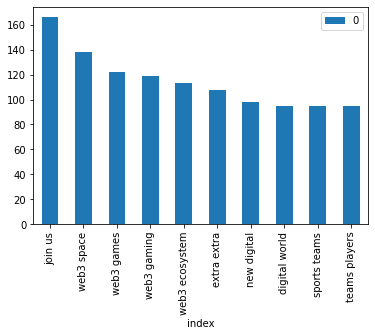

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Calculating Term Frequency (TF)

cv = CountVectorizer(ngram_range=(2,2), min_df=0.01) # ngram range as 2,2 will give bigram, 3,3 will trigram, etc
word_count_vector = cv.fit_transform(docs) # This creates a word count vector. Note the input is list
#words = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())# To get the distribution of top n words in all documents in "tf"
words = pd.DataFrame(word_count_vector.sum(axis=0),columns=cv.get_feature_names())
words_T = words.T # Transposing words. Print (words) to see why.
# print(words_T)
words_T_sorted = words_T.sort_values(0,ascending=False).reset_index()# reset is providing a column heading for sort below
tf = words_T_sorted.head(15) # for top 10 words. Head (n) provide n top values
print(tf)
tf.plot.bar(x="index",y=0)

In [ ]:
# This calculates the IDF (count of word K in ith doc)
# Inverse Document Frequency (IDF) is a weight indicating how commonly a word is used.
# The more frequent its usage across documents, the lower its score. The lower the score, the less important the word becomes.

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(word_count_vector)
idf = pd.DataFrame({'feature_name':cv.get_feature_names(), 'idf_weights':tfidf_transformer.idf_})
print (idf)

      feature_name  idf_weights
0               00     6.489997
1              000     6.146225
2        000291sbx     9.460411
3             0003     9.460411
4            000th     9.460411
...            ...          ...
14360        zones     9.054946
14361       zoning     9.054946
14362         zoom     8.074117
14363         zuay     8.767264
14364          zv3     9.460411

[14365 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#idf_sorted = idf.sort_values('idf_weights', ascending=False)
#idf_sorted.head(20)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1), min_df=0.01)
vectorizer.fit(docs)
skl_output = vectorizer.transform(docs)

In [ ]:
tfidf = pd.DataFrame({'feature_name':vectorizer.get_feature_names(), 'tfidf_weights':vectorizer.idf_})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_sorted = tfidf.sort_values("tfidf_weights", ascending=False)
#The higher the TF-IDF score the more important or relevant the term is; as a term gets less relevant, its TF-IDF score will approach 0.

In [ ]:
tfidf_sorted.head(50)

,feature_name,tfidf_weights
81,irl,5.589210
174,value,5.589210
22,co,5.578847
26,communities,5.578847
86,labs,5.578847
84,keep,5.568591
64,fun,5.568591
171,user,5.568591
19,chain,5.558439
105,members,5.558439


In [ ]:
#References
#https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d
#https://towardsdatascience.com/how-to-download-and-visualize-your-twitter-network-f009dbbf107b
#https://medium.com/social-media-theories-ethics-and-analytics/analysis-of-twitter-social-network-d5023e1a1aa
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/